# BERT Fine-tuning results

In [75]:
import wandb
import matplotlib.pyplot as plt

In [76]:
wandb.login(key='')
api = wandb.Api()

project_name = "bert-multiling-training"

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/gustaw/.netrc


In [77]:
runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")
history = runs[0].history()
history.head()

,eval_accuracy,eval/steps_per_second,eval_f1,_runtime,eval_samples_per_second,eval_precision,train/global_step,train/loss,eval/f1,eval_recall,...,_timestamp,eval/precision,_step,train/epoch,eval/runtime,train/grad_norm,eval_runtime,eval/samples_per_second,epoch,eval/loss
0,NaN,NaN,NaN,5.040554,NaN,NaN,10,0.1812,NaN,NaN,...,1.739881e+09,NaN,0,0.015528,NaN,0.037839,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,5.728713,NaN,NaN,20,0.0006,NaN,NaN,...,1.739881e+09,NaN,1,0.031056,NaN,0.008875,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,6.384205,NaN,NaN,30,0.0002,NaN,NaN,...,1.739881e+09,NaN,2,0.046584,NaN,0.004694,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,7.097818,NaN,NaN,40,0.0002,NaN,NaN,...,1.739881e+09,NaN,3,0.062112,NaN,0.003380,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,7.753101,NaN,NaN,50,0.0001,NaN,NaN,...,1.739881e+09,NaN,4,0.077640,NaN,0.002707,NaN,NaN,NaN,NaN


In [78]:
history.columns

Index(['eval_accuracy', 'eval/steps_per_second', 'eval_f1', '_runtime',
       'eval_samples_per_second', 'eval_precision', 'train/global_step',
       'train/loss', 'eval/f1', 'eval_recall', 'eval/accuracy',
       'train/learning_rate', 'eval_loss', 'eval/recall',
       'eval_steps_per_second', '_timestamp', 'eval/precision', '_step',
       'train/epoch', 'eval/runtime', 'train/grad_norm', 'eval_runtime',
       'eval/samples_per_second', 'epoch', 'eval/loss'],
      dtype='object')

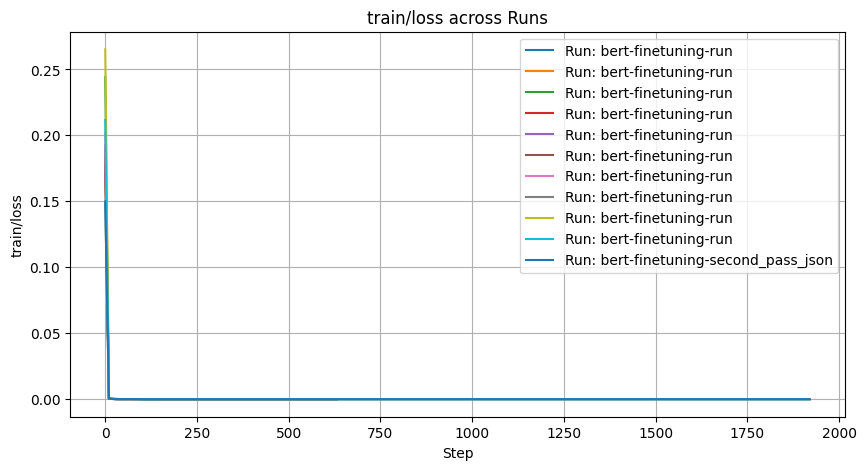

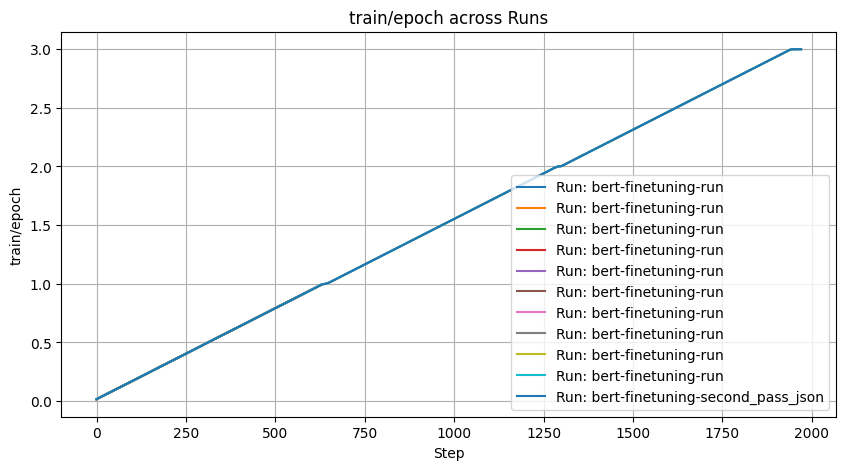

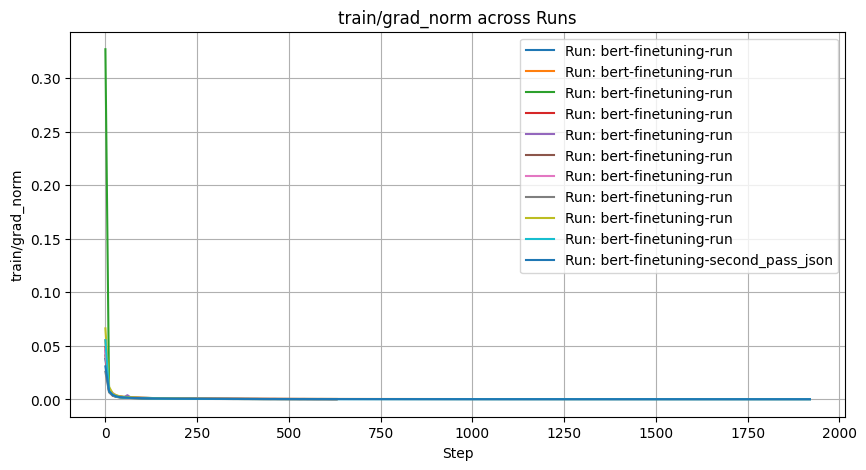

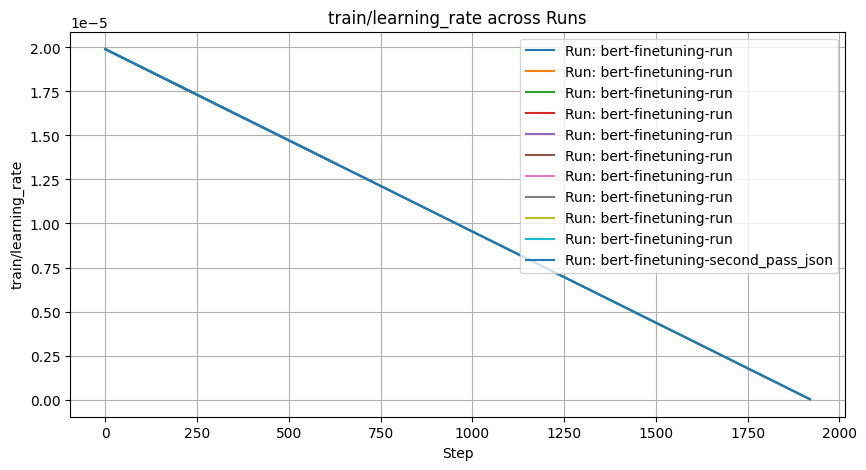

In [79]:
def plot_runs_data(runs, metric):
    plt.figure(figsize=(10, 5))
    for run in runs:
        hist = run.history()
        if hist.shape[0] == 0:
            continue
        if metric in hist.columns:
            # filter-out nans
            data = hist[metric].dropna()
            labels = [x*10 for x in range(data.shape[0])]
            #print(hist.columns)
            #print(hist[metric])
            plt.plot(labels, data, label=f"Run: {run.name}")

    plt.xlabel("Step")
    plt.ylabel(metric)
    plt.title(f"{metric} across Runs")
    plt.legend()
    plt.grid()
    plt.show()

plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/epoch")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

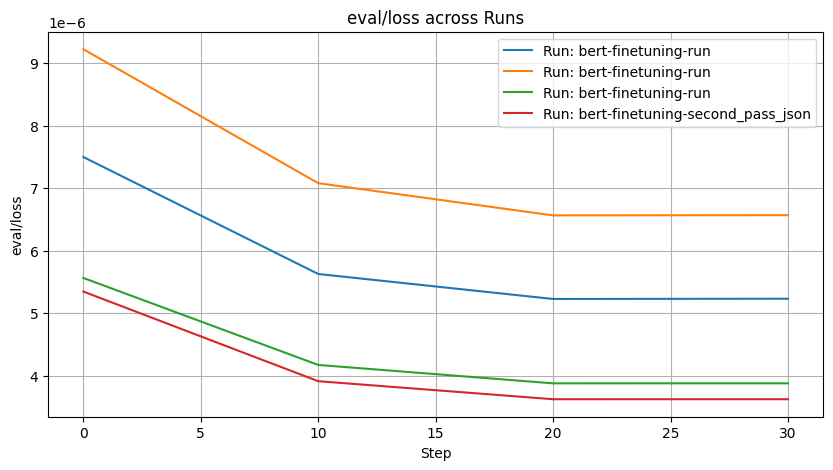

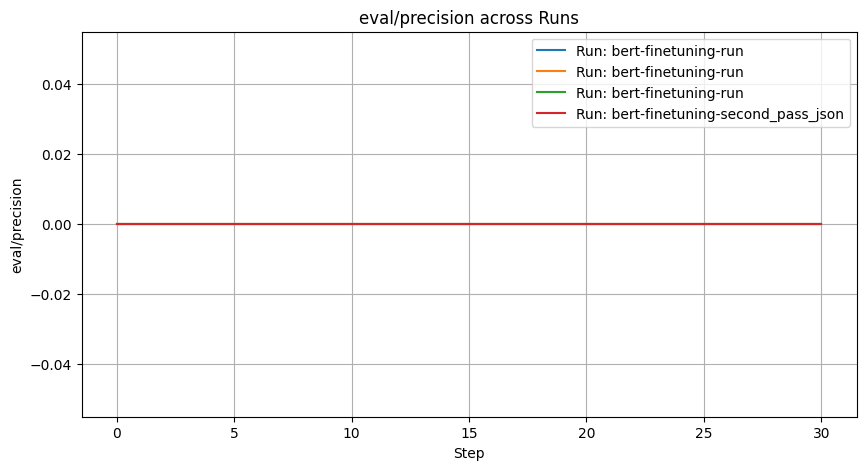

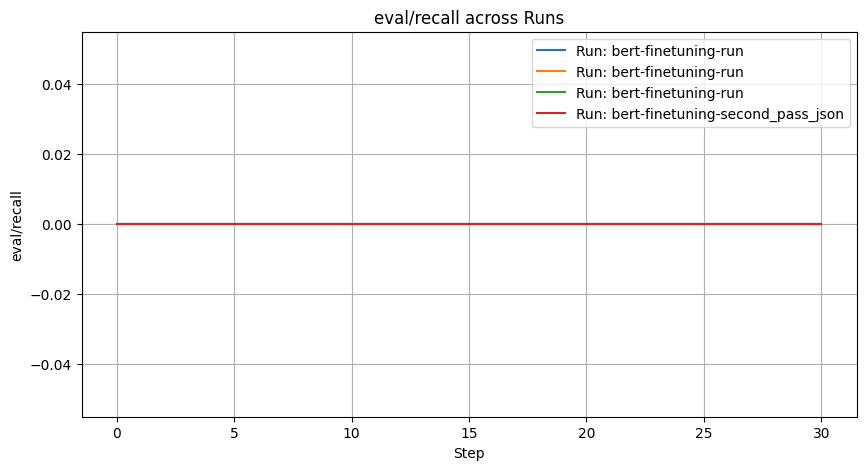

In [80]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")